<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/004_superstore_LOSS_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import & Process Data

Dataset loaded successfully!
Missing Data:  0
Step 1: Preprocessing the data...
Step 2: Adding time-based columns...
Step 3: Converting to category and visualizing...



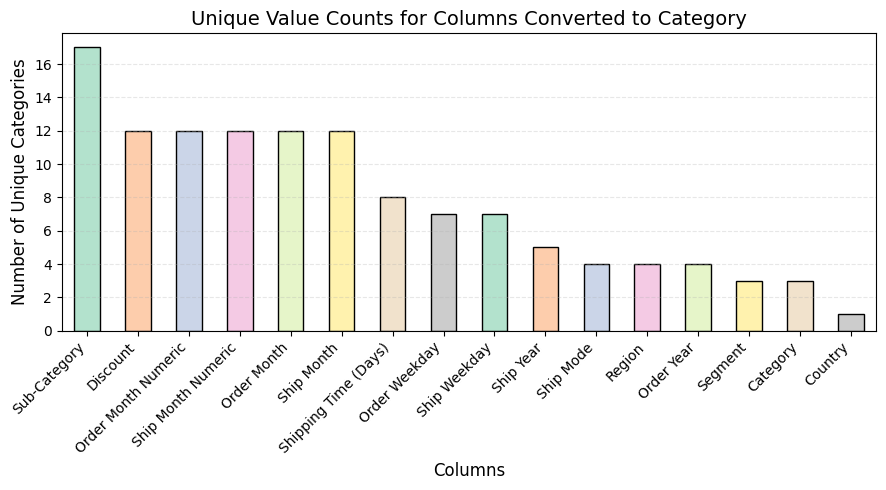


Step 4: Removing duplicates...
Removed 0 duplicate rows.
Step 5: Standardizing selected categorical columns...

Data preparation completed!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     9994 non-null   int64         
 1   Order ID                   9994 non-null   object        
 2   Order Date                 9994 non-null   datetime64[ns]
 3   Ship Date                  9994 non-null   datetime64[ns]
 4   Ship Mode                  9994 non-null   category      
 5   Customer ID                9994 non-null   object        
 6   Customer Name              9994 non-null   object        
 7   Segment                    9994 non-null   category      
 8   Country                    9994 non-null   category      
 9   City                       9994 non-null   object     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import the updated script
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)

# Load the dataset
file_path = '/content/sample-superstore.xls'
data = pd.read_excel(file_path)

print("Dataset loaded successfully!")
print("Missing Data: ", data.isnull().sum().sum())

# Prepare the dataset
exclude_columns = ['Profit per Category', 'Profit per Sub-Category', 'Regional Market Share (%)', 'Quantity', 'Order Count']
data = dpu.prepare_data(data, exclude_columns=exclude_columns)

# Final check
print(data.info())


In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Margin', 'Shipping Time (Days)', 'Estimated Cost',
       'Profitability Ratio', 'Effective Price', 'Sales_Customer',
       'Profit_Customer', 'Order Count', 'AOV', 'Regional Market Share (%)',
       'Profit per Category', 'Profit per Sub-Category', 'Order Year',
       'Order Month Numeric', 'Order Day', 'Order Weekday', 'Ship Year',
       'Ship Month Numeric', 'Ship Day', 'Ship Weekday', 'Order Month',
       'Ship Month'],
      dtype='object')

In [ ]:
data[[ 'Sales', 'Quantity', 'Profit', 'Profit Margin']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          9994 non-null   float64
 1   Quantity       9994 non-null   int64  
 2   Profit         9994 non-null   float64
 3   Profit Margin  9994 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 312.4 KB


### Unique Categories for Categorical Columns

In [ ]:
# Select categorical columns
categorical_columns = data.select_dtypes(include='category').columns

print("Unique categories for each categorical column:\n")
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"{column} ({len(unique_values)} unique values):")
    print(unique_values)
    print("-" * 50)

Unique categories for each categorical column:

Ship Mode (4 unique values):
['Second Class', 'Standard Class', 'First Class', 'Same Day']
Categories (4, object): ['First Class', 'Same Day', 'Second Class', 'Standard Class']
--------------------------------------------------
Segment (3 unique values):
['Consumer', 'Corporate', 'Home Office']
Categories (3, object): ['Consumer', 'Corporate', 'Home Office']
--------------------------------------------------
Country (1 unique values):
['United States']
Categories (1, object): ['United States']
--------------------------------------------------
Region (4 unique values):
['South', 'West', 'Central', 'East']
Categories (4, object): ['Central', 'East', 'South', 'West']
--------------------------------------------------
Category (3 unique values):
['Furniture', 'Office Supplies', 'Technology']
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']
--------------------------------------------------
Sub-Category (17 unique values

In [ ]:
# Check original numeric and named months
print(data[['Order Month Numeric', 'Order Month']].head())
print(data[['Ship Month Numeric', 'Ship Month']].head())

# Verify the data types
print("Order Month dtype:", data['Order Month'].dtype)
print("Ship Month dtype:", data['Ship Month'].dtype)

  Order Month Numeric Order Month
0                  11    November
1                  11    November
2                   6        June
3                  10     October
4                  10     October
  Ship Month Numeric Ship Month
0                 11   November
1                 11   November
2                  6       June
3                 10    October
4                 10    October
Order Month dtype: category
Ship Month dtype: category


### Sales by Year

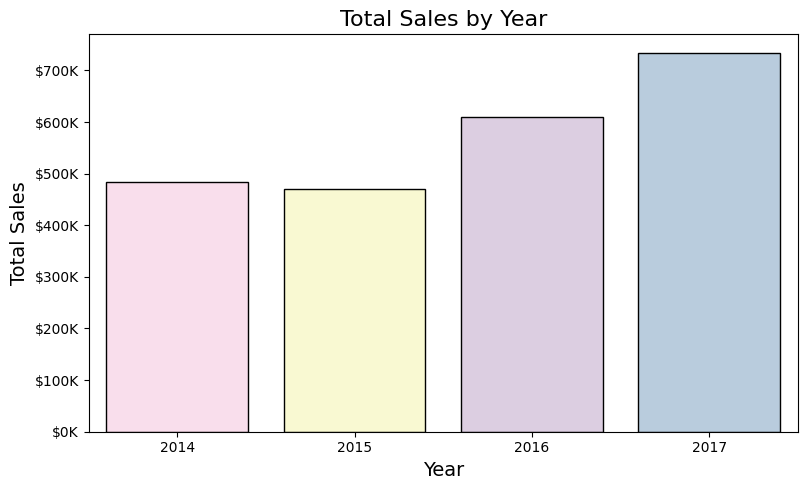

In [ ]:
# Aggregate sales by year
yearly_sales = data.groupby('Order Year', observed=True)['Sales'].sum()

# Convert sales to thousands for readability
yearly_sales_k = yearly_sales / 1000

# Plot sales by year
plt.figure(figsize=(8, 5))
sns.barplot(
    x=yearly_sales_k.index,
    y=yearly_sales_k.values,
    hue=yearly_sales_k.index,
    palette='Pastel1_r', edgecolor='k',
    legend=False, dodge=False  # Ensures one bar per year
)
plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
# plt.xticks(rotation=45)
plt.tight_layout()

# Format y-axis labels with dollar sign and 'K'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))

plt.show()


### Sales by Region

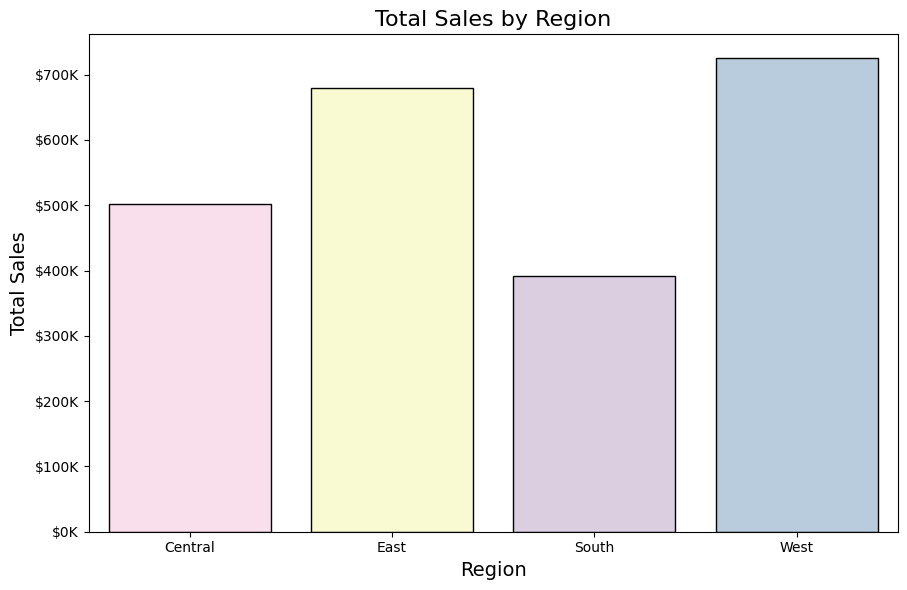

In [ ]:
# Aggregate sales by region
region_sales = data.groupby('Region', observed=True)['Sales'].sum()

# Convert sales to thousands for readability
region_sales_k = region_sales / 1000

# Plot sales by region
plt.figure(figsize=(9, 6))
sns.barplot(
    x=region_sales_k.index, y=region_sales_k.values,
    hue=region_sales_k.index, palette='Pastel1_r',
    edgecolor='k',legend=False, dodge=False  # Ensures one bar per region
)
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
# plt.xticks(rotation=45)
plt.tight_layout()

# Format y-axis labels with dollar sign and 'K'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))

plt.show()


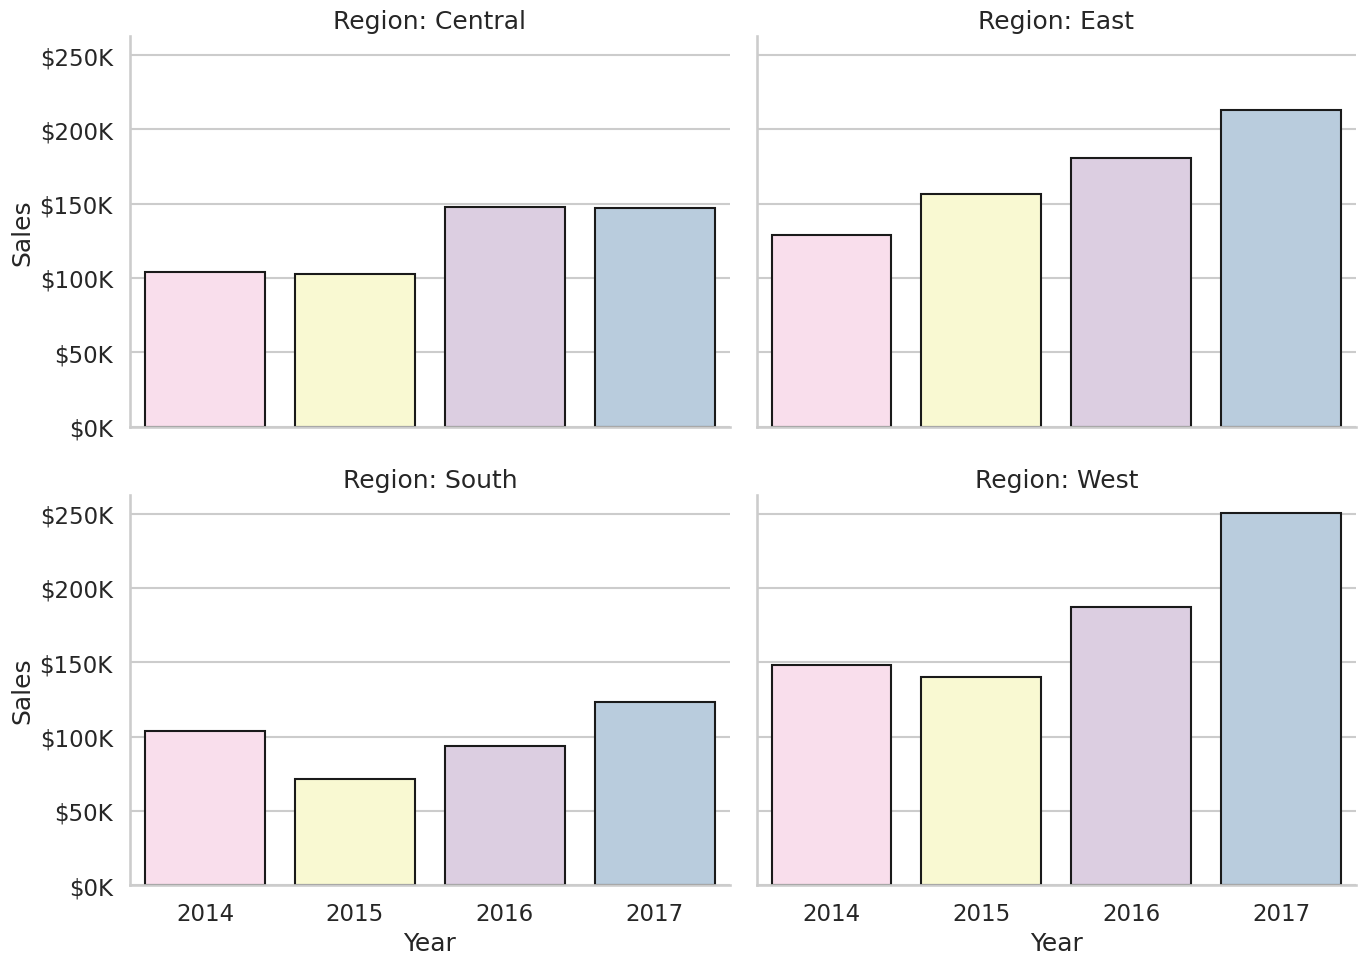

In [ ]:
# Set Seaborn style and context
sns.set_theme(style="whitegrid", context="talk")  # "talk" is great for presentations

# Aggregate sales by year and region
year_region_sales = data.groupby(['Order Year', 'Region'], observed=True)['Sales'].sum().reset_index()

# Convert sales to thousands
year_region_sales['Sales (in $K)'] = year_region_sales['Sales'] / 1000

# Ensure 'Order Year' is treated as categorical with proper order
year_order = sorted(data['Order Year'].unique())  # Ordered years
year_region_sales['Order Year'] = pd.Categorical(year_region_sales['Order Year'], categories=year_order, ordered=True)

# Create the grid layout
grid = sns.FacetGrid(
    year_region_sales, col="Region", col_wrap=2,
    height=5, aspect=1.4, sharey=True,
)

# Add barplots to the grid
grid.map_dataframe(
    sns.barplot, x="Order Year", y="Sales (in $K)", hue="Order Year",  # Color-coded by year
    palette="Pastel1_r", edgecolor="k", dodge=False,  # Disable dodge since hue matches x-axis
)

# Add labels and formatting
grid.set_titles("Region: {col_name}")
grid.set_axis_labels("Year", "Sales")
# grid.set_xticklabels(rotation=45, ha="right")
# grid.figure.subplots_adjust(top=0.9)  # Adjust space at the top
# grid.figure.suptitle("Sales by Year & Region", fontsize=18)

# Format y-axis labels with dollar sign
for ax in grid.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))

plt.tight_layout()
plt.show()


### Sales by Month

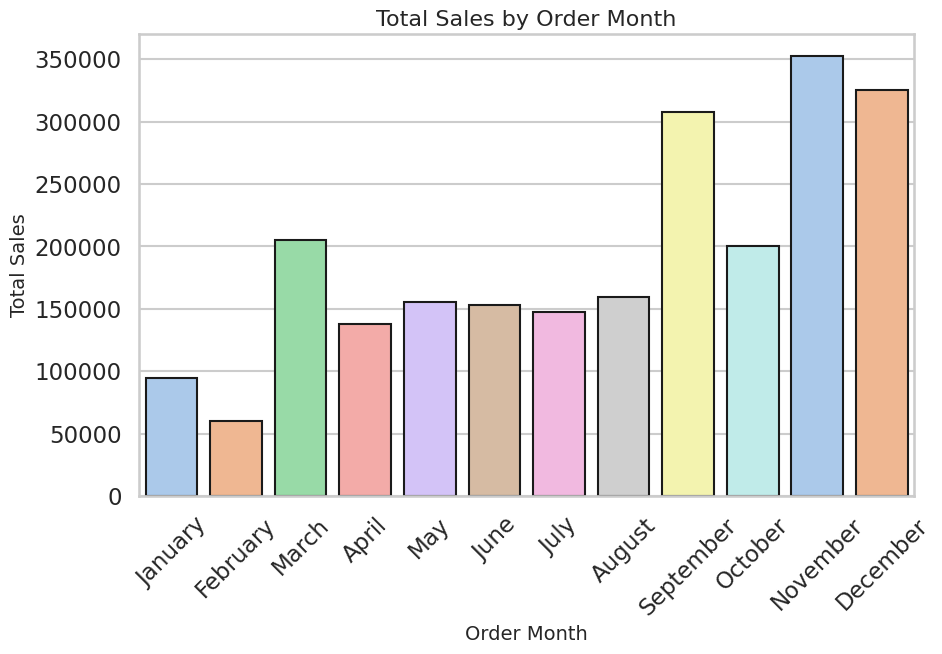

In [ ]:
# Aggregate sales by order month
monthly_sales = data.groupby('Order Month', observed=True)['Sales'].sum()

# Plot sales by month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, hue=monthly_sales.index, palette='pastel', edgecolor='k',
            order=monthly_sales.index)
plt.title('Total Sales by Order Month', fontsize=16)
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()


### Sales by Weekday

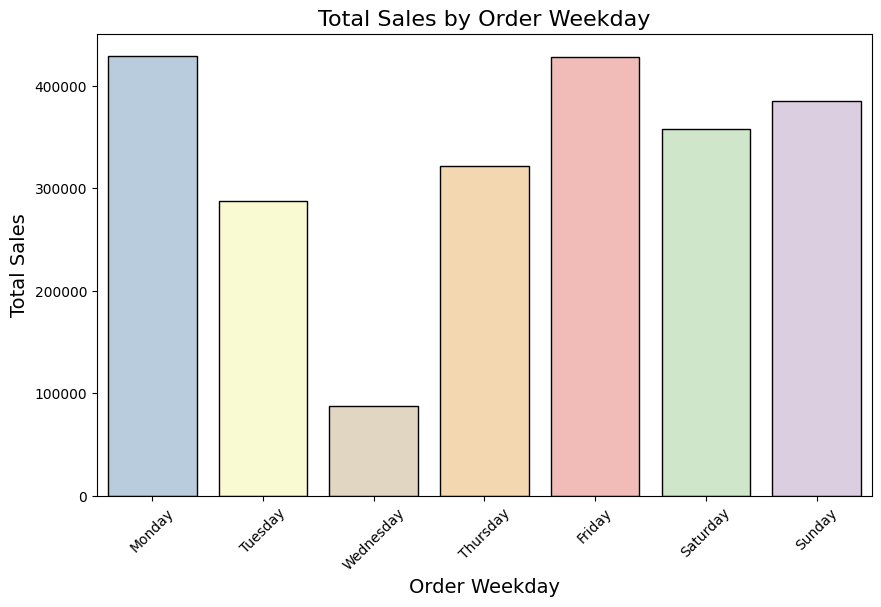

In [ ]:
# Aggregate sales by weekday
weekday_sales = data.groupby('Order Weekday', observed=True)['Sales'].sum()

# Plot sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, hue=weekday_sales.index,palette='Pastel1', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], edgecolor='k')
plt.title('Total Sales by Order Weekday', fontsize=16)
plt.xlabel('Order Weekday', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()


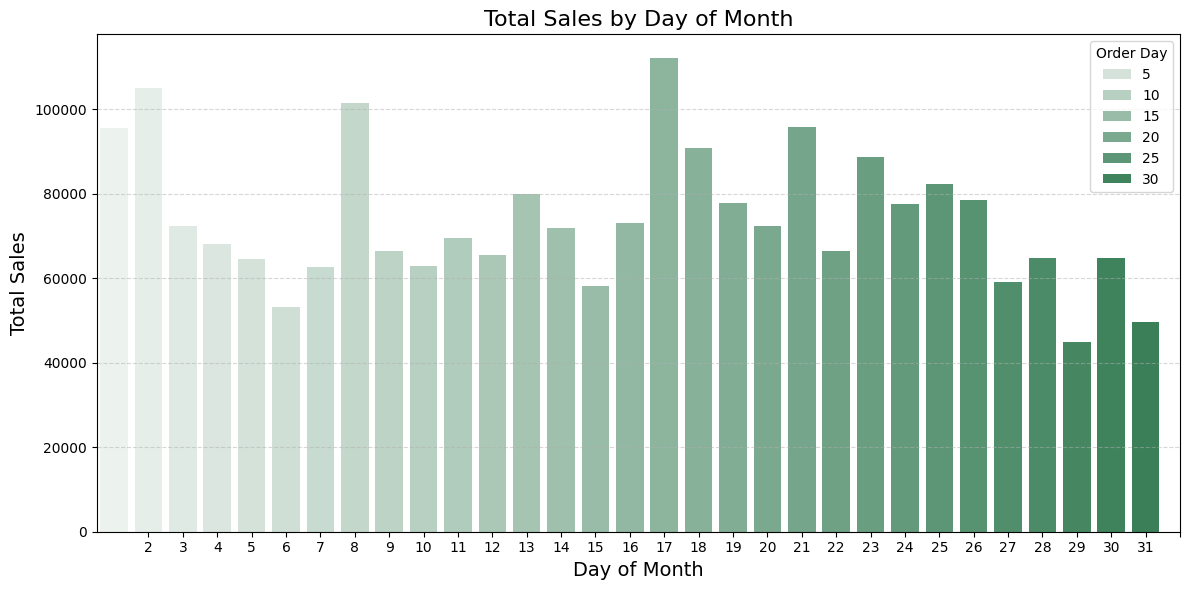

In [ ]:
# Aggregate sales by order day
day_sales = data.groupby('Order Day', observed=True)['Sales'].sum()

# Plot sales by day of month
plt.figure(figsize=(12, 6))
sns.barplot(
    x=day_sales.index.astype(int),  # Convert categorical to numeric for sorting
    y=day_sales.values, hue=day_sales.index.astype(int),
    # palette='spectral'
    palette=sns.light_palette("seagreen", as_cmap=True)
)
plt.title('Total Sales by Day of Month', fontsize=16)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(range(1, 32))  # Days of the month (1-31)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Developing a comprehensive strategy to analyze the data will help uncover meaningful insights. Here's a step-by-step approach to analyzing the Superstore dataset:

---

### **Analysis Strategy**

#### **1. Data Familiarization**
   - **Objective**: Understand the dataset structure, key columns, and relationships.
   - **Actions**:
     - **Inspect Data**:
       - Print the first few rows (`head`) and a summary (`info` and `describe`).
       - Explore unique values in key categorical columns (e.g., `Region`, `Category`, `Ship Mode`).
     - **Visualize Distributions**:
       - Use histograms or boxplots for numeric columns (`Sales`, `Profit`).
       - Use bar charts for categorical columns (`Category`, `Region`).

---

#### **2. Exploratory Data Analysis (EDA)**
   - **Objective**: Identify patterns and relationships.
   - **Actions**:
     - **Univariate Analysis**:
       - Summarize sales, profit, and order counts by categories like `Region`, `Segment`, `Category`, and `Sub-Category`.
       - Analyze distributions of shipping times and discounts.
     - **Bivariate Analysis**:
       - Analyze relationships between `Sales`, `Profit`, and `Discount`.
       - Explore the impact of `Ship Mode` and `Region` on profitability.
     - **Temporal Analysis**:
       - Plot sales trends over time (e.g., monthly, yearly).
       - Examine seasonal patterns (e.g., weekday trends).

---

#### **3. Statistical Analysis**
   - **Objective**: Test hypotheses and validate trends statistically.
   - **Actions**:
     - **Variance Analysis**:
       - Perform ANOVA to test if `Profit` or `Sales` significantly differ across `Region` or `Category`.
     - **Correlation Analysis**:
       - Assess correlations between `Sales`, `Profit`, `Quantity`, and `Discount`.
     - **T-tests**:
       - Compare profitability between high and low discount orders.
     - **Chi-Square Test**:
       - Test independence between categorical variables like `Ship Mode` and `Region`.

---

#### **4. Advanced Insights**
   - **Objective**: Derive actionable insights through deeper analyses.
   - **Actions**:
     - **Customer Segmentation**:
       - Group customers by profitability (`Profit_Customer`) and sales (`Sales_Customer`).
       - Identify high-value customers and regions.
     - **Product Performance**:
       - Evaluate product performance by `Category` and `Sub-Category`.
       - Identify best-selling and low-performing products.
     - **Shipping Efficiency**:
       - Analyze shipping times (`Shipping Time (Days)`) by `Ship Mode` and `Region`.
       - Identify inefficiencies in delivery.

---

#### **5. Visualization Strategy**
   - **Objective**: Create clear, compelling visuals for exploration and communication.
   - **Actions**:
     - **Summary Visuals**:
       - Barplots for categorical summaries (e.g., sales by `Region`).
       - Heatmaps for correlations and sales trends by time (`Year`, `Month`).
     - **Trend Visuals**:
       - Line charts for time-series analysis.
       - Stacked bar charts for `Sales` by `Region` and `Category`.
     - **Deep Dive Visuals**:
       - Scatterplots for `Sales` vs. `Profit` with `Discount` as the hue.
       - Treemaps for product performance.

---

#### **6. Derive Actionable Insights**
   - **Objective**: Summarize findings to guide business decisions.
   - **Actions**:
     - Identify key growth areas (e.g., underperforming regions or product categories).
     - Recommend strategies for improving shipping efficiency or customer segmentation.
     - Highlight significant patterns, such as the impact of discounts on profitability.

---

### **Implementation Plan**
1. Start with data familiarization and univariate analysis.
2. Progress to EDA with bivariate and temporal analyses.
3. Perform statistical tests to validate findings.
4. Use advanced insights to uncover actionable strategies.
5. Summarize results in a presentation-ready format.



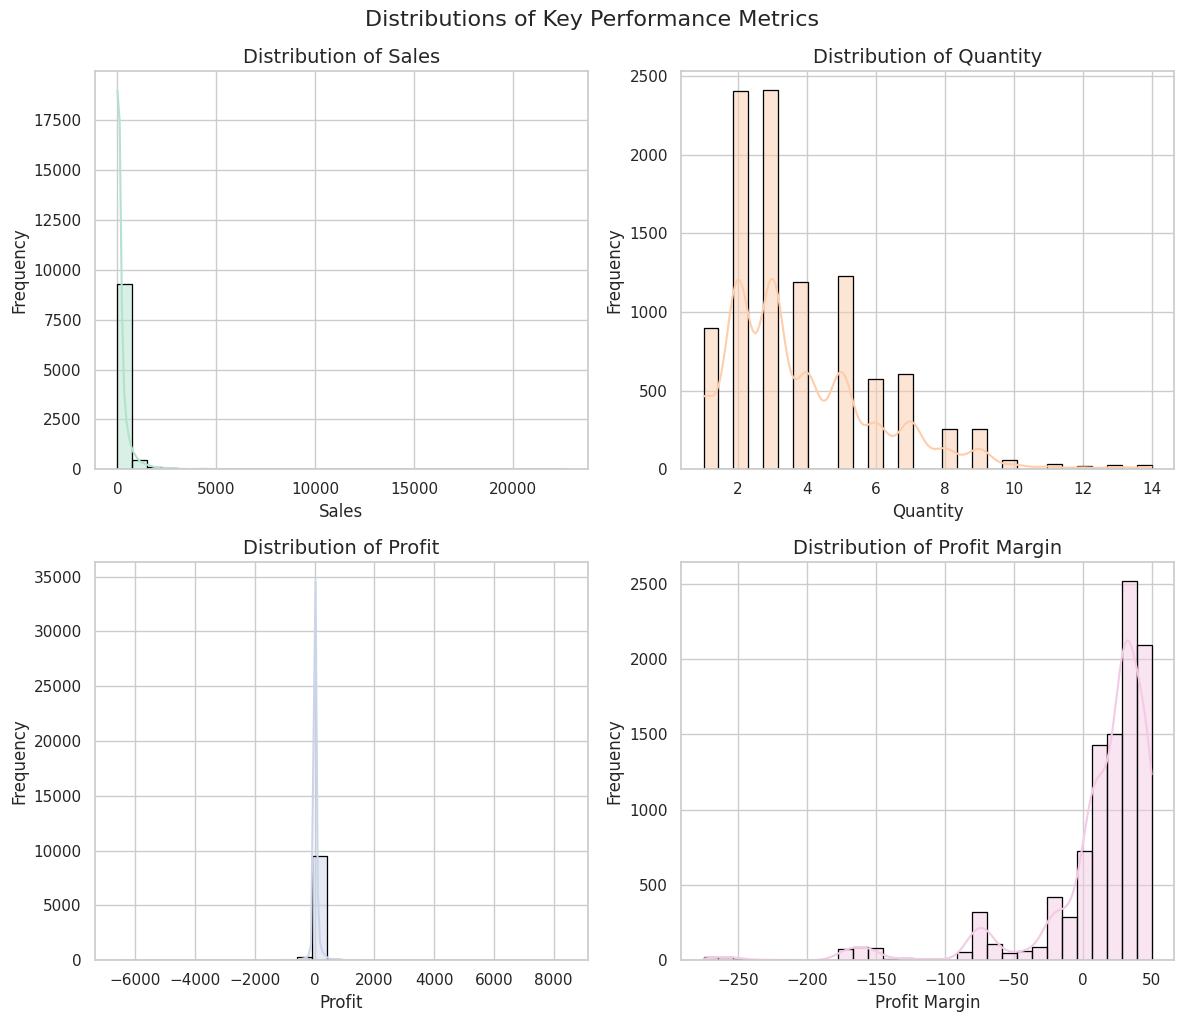

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and context
sns.set_theme(style="whitegrid", context="notebook")

# Columns to plot
columns_to_plot = ['Sales', 'Quantity', 'Profit', 'Profit Margin']

# Define a palette for different colors
palette = sns.color_palette("Pastel2", len(columns_to_plot))

# Create the 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each column as a histogram with unique colors
for i, column in enumerate(columns_to_plot):
    sns.histplot(
        data[column],
        bins=30,
        kde=True,
        ax=axes[i],
        color=palette[i],
        edgecolor="black"
    )
    axes[i].set_title(f"Distribution of {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Adjust layout and spacing
plt.tight_layout()
plt.suptitle("Distributions of Key Performance Metrics", fontsize=16, y=1.02)
plt.show()



Negative profits could indicate issues such as unprofitable products, excessive discounts, or other business inefficiencies. To investigate these negative values further, we can analyze them systematically:

---

### Analyze Negative Profits:
1. **Filter Negative Profits**:
   - Extract rows where the `Profit` is negative.
   
2. **Explore Patterns**:
   - Examine the distribution of negative profits.
   - Identify relationships between negative profits and other variables (e.g., `Category`, `Sub-Category`, `Region`, `Discount`).

3. **Summarize Impact**:
   - Compute the total negative profit by `Category`, `Sub-Category`, and `Region`.
   - Analyze discounts associated with negative profits.


### Analysis Breakdown:
1. **Histogram of Negative Profits**:
   - Visualize the distribution of losses to check for patterns (e.g., extreme outliers).

2. **Category and Sub-Category Impact**:
   - Summarize the total negative profit by `Category` and `Sub-Category` to identify unprofitable areas.

3. **Discount Contribution**:
   - Check how `Discount` correlates with negative profits. Excessive discounts might be a root cause.

---

### Expected Insights:
- **Unprofitable Products**: Certain sub-categories might consistently yield negative profits.
- **Regional Trends**: Some regions might contribute disproportionately to losses.
- **Discount Patterns**: Large discounts may be linked to significant losses.



Number of transactions with negative profit: 1871
Percentage of transactions with negative profit: 18.72%
Total negative profit: $-156,131.29


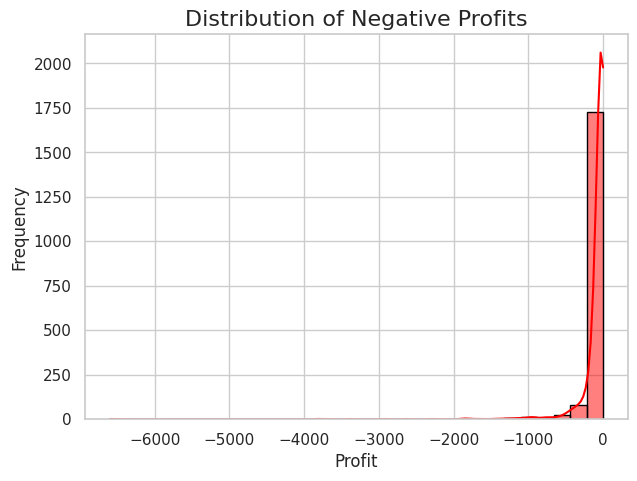

In [ ]:
# Filter rows with negative profits
negative_profits = data[data['Profit'] < 0]

# Summary of negative profits
total_transactions = data.shape[0]
negative_transactions = negative_profits.shape[0]
negative_percentage = (negative_transactions / total_transactions) * 100

print(f"Number of transactions with negative profit: {negative_transactions}")
print(f"Percentage of transactions with negative profit: {negative_percentage:.2f}%")
print(f"Total negative profit: ${negative_profits['Profit'].sum():,.2f}")

# Distribution of negative profits
plt.figure(figsize=(7,5))
sns.histplot(negative_profits['Profit'], bins=30, kde=True, color="red", edgecolor="black")
plt.title("Distribution of Negative Profits", fontsize=16)
plt.xlabel("Profit", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
# Analyze negative profits by sub-category and order by profit
subcategory_summary = (
    negative_profits
    .groupby(['Category', 'Sub-Category'], observed=True)['Profit']
    .sum()
    .reset_index()  # Convert Series to DataFrame
    .sort_values(by='Profit', ascending=True)  # Order by negative profit
)

subcategory_summary.reset_index(drop=True, inplace=True)
subcategory_summary

,Category,Sub-Category,Profit
0,Office Supplies,Binders,-38510.4964
1,Furniture,Tables,-32412.1483
2,Technology,Machines,-30118.6682
3,Furniture,Bookcases,-12152.2060
4,Furniture,Chairs,-9880.8413
5,Office Supplies,Appliances,-8629.6412
6,Technology,Phones,-7530.6235
7,Furniture,Furnishings,-6490.9134
8,Office Supplies,Storage,-6426.3038
9,Office Supplies,Supplies,-3015.6219


In [ ]:
# Analyze negative profits by sub-category and order by profit
subcategory_summary = negative_profits.groupby(['Category', 'Sub-Category'], observed=True).agg(
    Profit=('Profit', 'sum')
).reset_index()  # Reset index to convert to DataFrame

# Sort by Profit in ascending order
subcategory_summary = subcategory_summary.sort_values(by='Profit', ascending=True).reset_index(drop=True)

subcategory_summary


,Category,Sub-Category,Profit
0,Office Supplies,Binders,-38510.4964
1,Furniture,Tables,-32412.1483
2,Technology,Machines,-30118.6682
3,Furniture,Bookcases,-12152.2060
4,Furniture,Chairs,-9880.8413
5,Office Supplies,Appliances,-8629.6412
6,Technology,Phones,-7530.6235
7,Furniture,Furnishings,-6490.9134
8,Office Supplies,Storage,-6426.3038
9,Office Supplies,Supplies,-3015.6219


In [ ]:
# Analyze negative profits by discount and order by profit
discount_summary = (
    negative_profits
    .groupby(['Discount'], observed=True)['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Profit', ascending=True)
)

# reset index for plotting ordered by profit
discount_summary.reset_index(drop=True, inplace=True)
discount_summary

,Discount,Profit
0,0.70,-40075.3569
1,0.80,-30539.0392
2,0.40,-25787.8268
3,0.50,-20506.4281
4,0.20,-17258.0654
5,0.30,-10777.6879
6,0.60,-5944.6552
7,0.45,-2493.1111
8,0.32,-2391.1377
9,0.15,-328.7030


In [ ]:
# Analyze negative profits by sub-category and order by profit
subcategory_summary = (
    negative_profits
    .groupby(['Category', 'Sub-Category'], observed=True)['Profit']
    .sum()
    .reset_index()  # Convert Series to DataFrame
    .sort_values(by='Profit', ascending=True)  # Order by negative profit
)
# reset index for plotting ordered by profit
subcategory_summary.reset_index(drop=True, inplace=True)
print(subcategory_summary, '\n')

# Analyze negative profits by discount and order by profit
discount_summary = (
    negative_profits
    .groupby(['Discount'], observed=True)['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Profit', ascending=True)
)

# reset index for plotting ordered by profit
discount_summary.reset_index(drop=True, inplace=True)
# print(discount_summary)

           Category Sub-Category      Profit
0   Office Supplies      Binders -38510.4964
1         Furniture       Tables -32412.1483
2        Technology     Machines -30118.6682
3         Furniture    Bookcases -12152.2060
4         Furniture       Chairs  -9880.8413
5   Office Supplies   Appliances  -8629.6412
6        Technology       Phones  -7530.6235
7         Furniture  Furnishings  -6490.9134
8   Office Supplies      Storage  -6426.3038
9   Office Supplies     Supplies  -3015.6219
10       Technology  Accessories   -930.6265
11  Office Supplies    Fasteners    -33.1952 



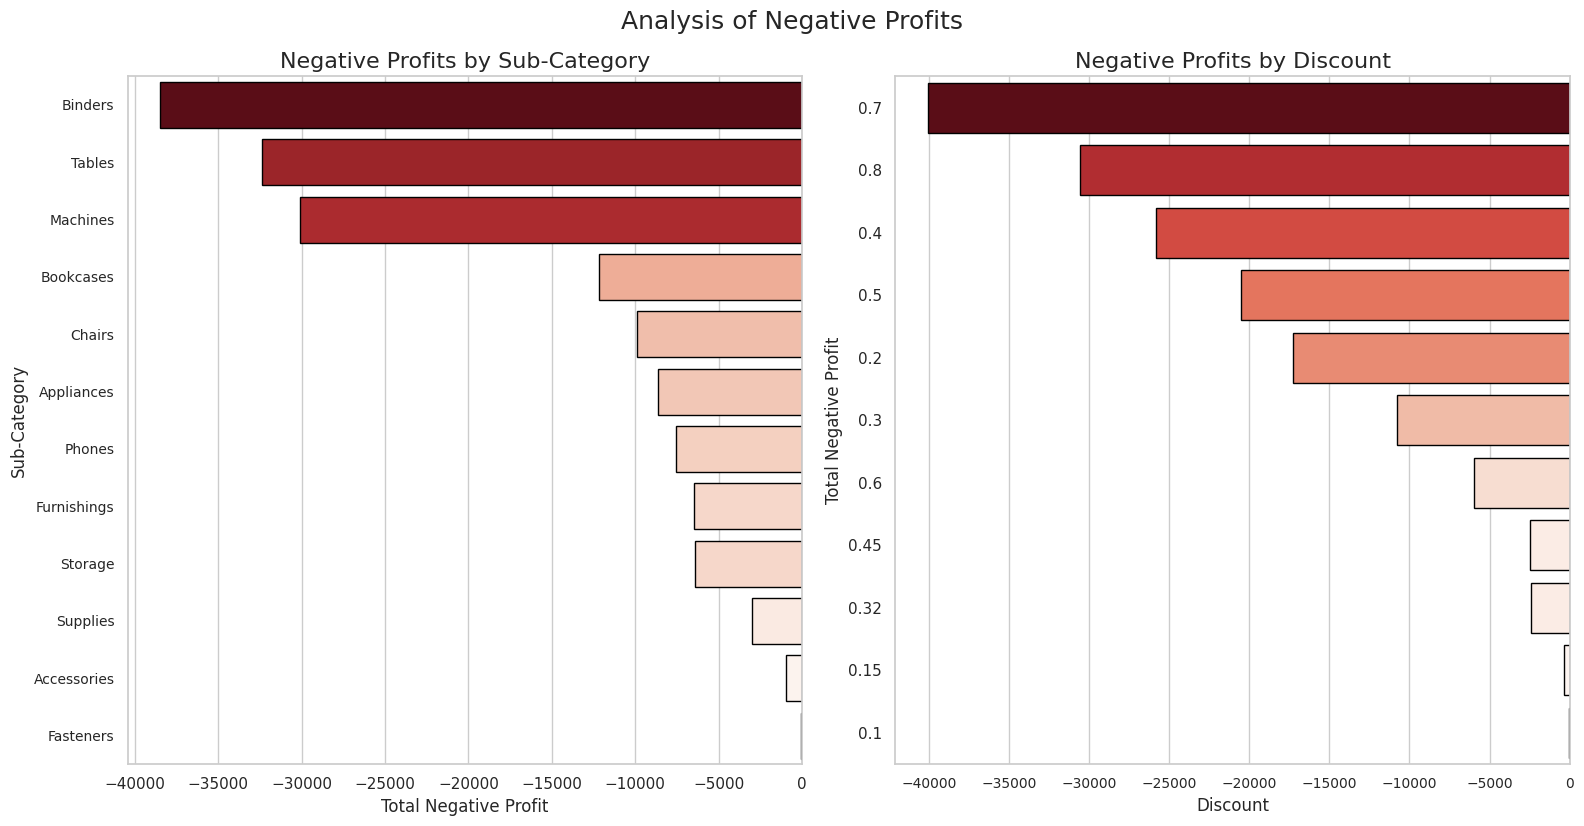

In [ ]:
# Create a 1x2 grid for visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot negative profits by sub-category
sns.barplot(
    data=subcategory_summary,
    x="Profit",
    y="Sub-Category",
    hue="Profit",
    palette="Reds_r",
    edgecolor="black",
    order=subcategory_summary["Sub-Category"], dodge=False, legend=False,
    ax=axes[0]
)
axes[0].set_title("Negative Profits by Sub-Category", fontsize=16)
axes[0].set_xlabel("Total Negative Profit", fontsize=12)
axes[0].set_ylabel("Sub-Category", fontsize=12)
axes[0].tick_params(axis='y', labelsize=10)

# Plot negative profits by discount
sns.barplot(
    data=discount_summary,
    x="Profit",
    y="Discount",
    hue="Profit", palette="Reds_r",
    edgecolor="black",
    order=discount_summary['Discount'], dodge=False, legend=False,
    ax=axes[1]
)
axes[1].set_title("Negative Profits by Discount", fontsize=16)
axes[1].set_xlabel("Discount", fontsize=12)
axes[1].set_ylabel("Total Negative Profit", fontsize=12)
axes[1].tick_params(axis='x', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("Analysis of Negative Profits", fontsize=18, y=1.03)
plt.show()


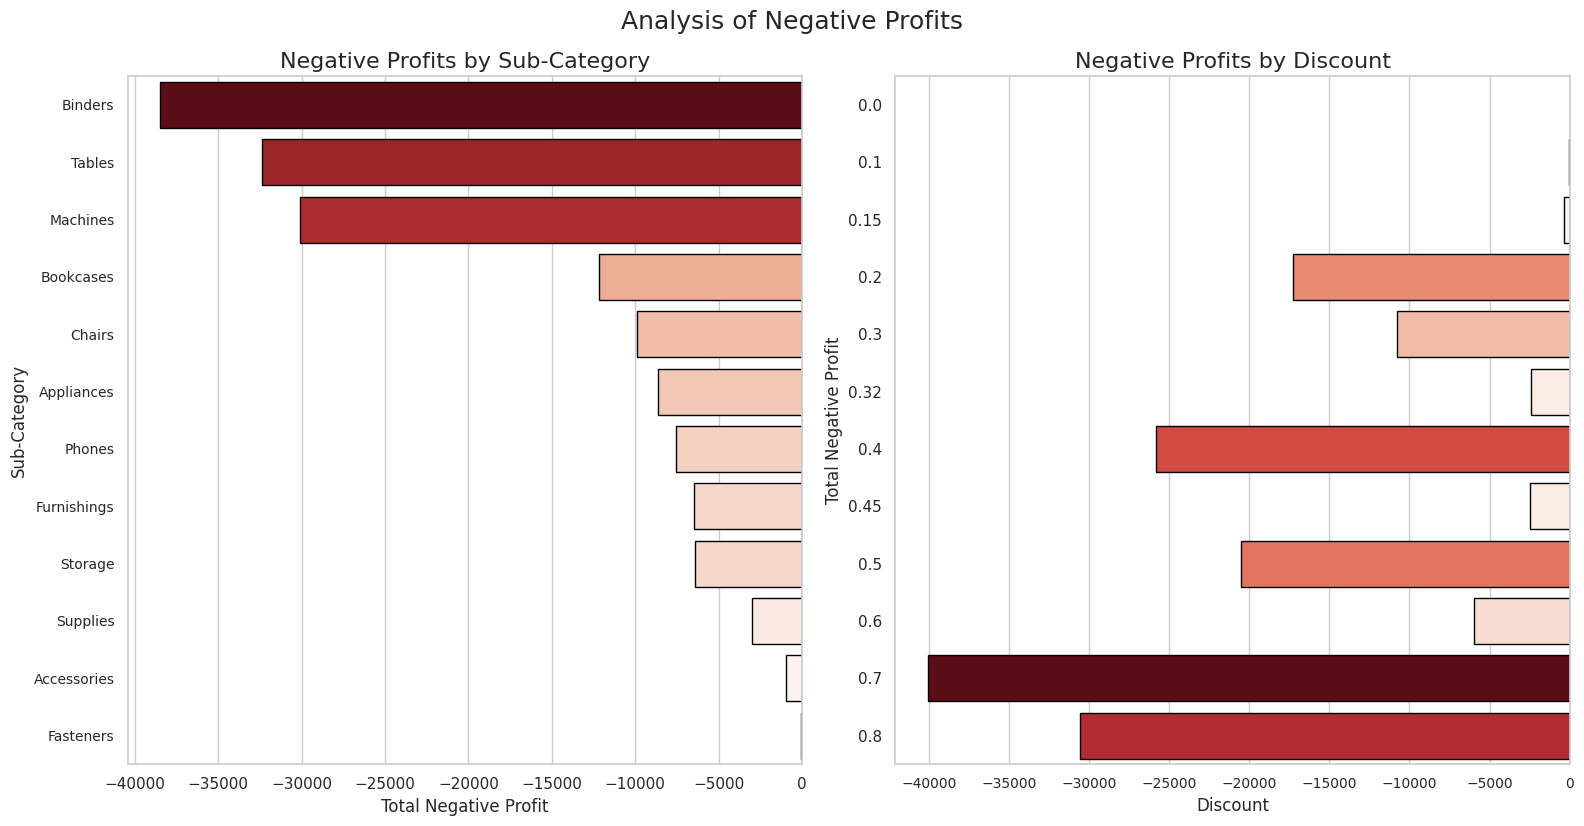

In [ ]:
# Create a 1x2 grid for visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot negative profits by sub-category
sns.barplot(
    data=subcategory_summary,
    x="Profit",
    y="Sub-Category",
    hue="Profit",
    palette="Reds_r",
    edgecolor="black",
    order=subcategory_summary["Sub-Category"], dodge=False, legend=False,
    ax=axes[0]
)
axes[0].set_title("Negative Profits by Sub-Category", fontsize=16)
axes[0].set_xlabel("Total Negative Profit", fontsize=12)
axes[0].set_ylabel("Sub-Category", fontsize=12)
axes[0].tick_params(axis='y', labelsize=10)

# Plot negative profits by discount
sns.barplot(
    data=discount_summary,
    x="Profit",
    y="Discount",
    hue="Profit", palette="Reds_r",
    edgecolor="black",
    dodge=False, legend=False,
    ax=axes[1]
)
axes[1].set_title("Negative Profits by Discount", fontsize=16)
axes[1].set_xlabel("Discount", fontsize=12)
axes[1].set_ylabel("Total Negative Profit", fontsize=12)
axes[1].tick_params(axis='x', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("Analysis of Negative Profits", fontsize=18, y=1.03)
plt.show()


In [ ]:
discount_summary

,Discount,Profit
0,0.70,-40075.3569
1,0.80,-30539.0392
2,0.40,-25787.8268
3,0.50,-20506.4281
4,0.20,-17258.0654
5,0.30,-10777.6879
6,0.60,-5944.6552
7,0.45,-2493.1111
8,0.32,-2391.1377
9,0.15,-328.7030


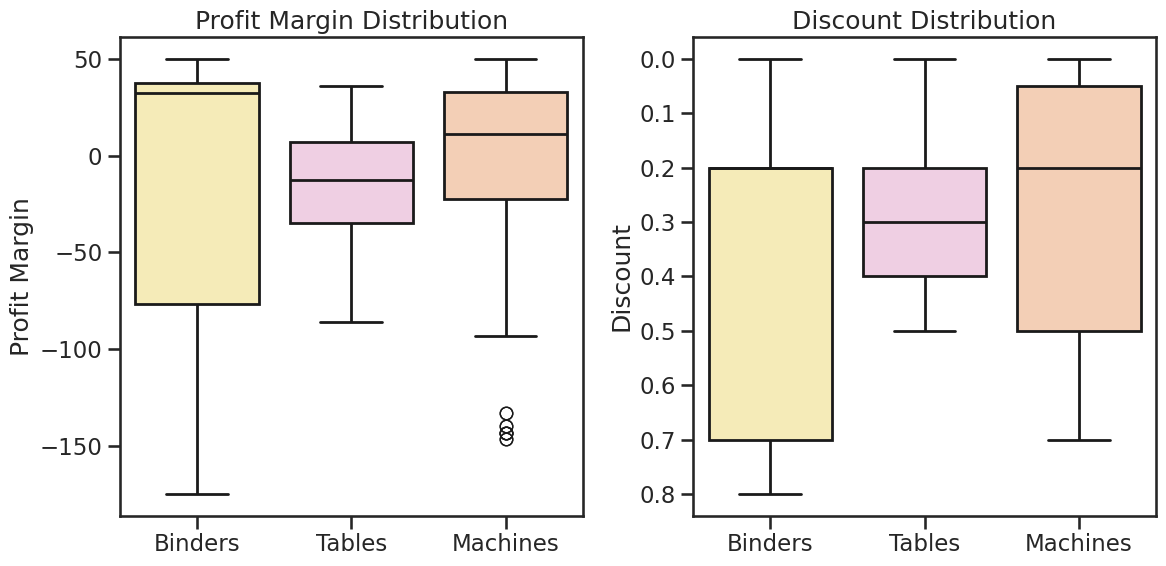

In [ ]:
# Filter data for the top loss-making subcategories
top_loss_subcategories = ['Binders', 'Tables', 'Machines']
filtered_data = data[data['Sub-Category'].isin(top_loss_subcategories)].copy()

# Reset the categories for the filtered data
filtered_data['Sub-Category'] = filtered_data['Sub-Category'].astype('category')
filtered_data['Sub-Category'] = filtered_data['Sub-Category'].cat.set_categories(top_loss_subcategories, ordered=True)

# Set Seaborn theme for aesthetics
sns.set_theme(style="ticks", context="talk")

# Create a 2x2 grid of boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define metrics and corresponding axes
metrics = ['Profit Margin', 'Discount']
titles = ['Profit Margin Distribution', 'Discount Distribution']

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.boxplot(
        data=filtered_data, x='Sub-Category', y=metric,
        hue='Sub-Category', palette="Pastel2_r",
        ax=ax, linewidth=2, linecolor='k'
    )
    ax.set_title(titles[i], fontsize=18)
    # ax.set_xlabel("Sub-Category", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel(metric)

# Adjust layout for better spacing
plt.tight_layout()
# plt.suptitle("Analysis of Top Loss-Making Subcategories", fontsize=22, y=1.02)
plt.show()


### Derived Metrics: Enhancing Insights

To maximize the analytical potential of our dataset, we created a series of derived metrics. These metrics provide deeper insights into profitability, customer behavior, shipping efficiency, and regional performance. Below is a summary of the derived metrics we added:

1. **Profit Margin**:
   - **Formula**: `(Profit / Sales) * 100`
   - **Purpose**: Measures profitability as a percentage of sales, helping us identify high-margin products or categories.

2. **Shipping Time (Days)**:
   - **Formula**: `Ship Date - Order Date`
   - **Purpose**: Tracks the time it takes for orders to ship, allowing us to analyze shipping efficiency and identify potential delays.

3. **Estimated Cost**:
   - **Formula**: `Sales - Profit`
   - **Purpose**: Provides an approximation of the cost associated with each sale, which can be used for cost analysis and benchmarking.

4. **Profitability Ratio**:
   - **Formula**: `(Profit / Estimated Cost) * 100`
   - **Purpose**: Highlights the profitability relative to costs, offering insights into the financial performance of products and regions.

5. **Effective Price**:
   - **Formula**: `Sales * (1 - Discount)`
   - **Purpose**: Shows the actual revenue generated after applying discounts, useful for evaluating the impact of promotions on sales.

6. **Customer Metrics**:
   - **Components**:
     - Total Sales (`Sales_Customer`)
     - Total Profit (`Profit_Customer`)
     - Number of Orders (`Order Count`)
   - **Purpose**: Aggregates customer-level data to analyze customer lifetime value and purchasing patterns.

7. **Average Order Value (AOV)**:
   - **Formula**: `Total Sales / Number of Orders`
   - **Purpose**: Calculates the average revenue per order, offering insights into customer purchasing behavior.

8. **Regional Market Share**:
   - **Formula**: `(Regional Sales / Total Sales) * 100`
   - **Purpose**: Measures the percentage contribution of each region to overall sales, useful for identifying key markets.

9. **Profit per Category and Sub-Category**:
   - **Formula**: Aggregated profit by `Category` and `Sub-Category`
   - **Purpose**: Helps identify the most and least profitable categories and subcategories, guiding strategic decision-making.

---

### Why Derived Metrics Matter
These metrics transform raw data into actionable insights. For example:
- **Profit Margin** and **Profitability Ratio** reveal financial efficiency.
- **Shipping Time** identifies operational bottlenecks.
- **Customer Metrics** and **AOV** highlight customer value and purchasing behavior.
- **Regional Market Share** and **Profit by Category** guide strategic focus on high-performing areas.

### Converting Columns to Categorical Data

To optimize the dataset and prepare for visualization, I identified columns with fewer than 25 unique values and converted them to the `category` data type. This process reduces memory usage and makes the data more efficient to handle, especially for categorical analyses.

#### Steps:
1. **Count Unique Values**: We calculated the number of unique values for each column using `.nunique()`.
2. **Set Threshold**: Columns with fewer than 25 unique values were identified as suitable for conversion.
3. **Conversion**: These columns were converted to the `category` data type using `.astype('category')`.

This preprocessing step ensures that categorical data is appropriately formatted for future analysis and visualizations.

### Extract and Convert Time-Based Features:

Extracting time-based features like month, day, and weekday from the order and ship dates will open up new possibilities for visualization and analysis. Here's how you can do it:

### Explanation:
1. **Datetime Conversion**: Ensures that `Order Date` and `Ship Date` are in datetime format using `pd.to_datetime()`.
2. **Extract Features**:
   - **Month**: Extracts the month as a number (e.g., January = 1).
   - **Day**: Extracts the day of the month.
   - **Weekday**: Extracts the name of the weekday (e.g., Monday, Tuesday).
3. **Convert to Categorical**: Converts the extracted features to the `category` data type for efficient storage and analysis.
4. **Verification**: Prints the data types of the new columns to confirm the conversion.

Breaking the analysis into multiple focused notebooks is a great idea. This makes each notebook easier to manage, read, and present while allowing you to deep dive into specific topics. Here’s a strategy to structure the notebooks effectively:

---

### **Proposed Notebook Topics**

#### 1. **Sales Overview**
   - **Focus**: High-level sales trends and patterns.
   - **Contents**:
     - Distribution of `Sales`.
     - Sales trends over time (monthly/yearly).
     - Sales by subcategories and categories.
     - Regional sales performance.
   - **Example Visualizations**:
     - Line plots for sales trends.
     - Barplots for sales by category, subcategory, and region.

#### 2. **Profit Analysis**
   - **Focus**: Understanding profitability and related patterns.
   - **Contents**:
     - Distribution of `Profit` and `Profit Margin`.
     - Profits by category, subcategory, and region.
     - High vs. low-profit subcategories.
     - Impact of sales volume on profit.
   - **Example Visualizations**:
     - Boxplots of profit margins by category.
     - Heatmaps for profit correlation with other variables.

#### 3. **Loss Analysis**
   - **Focus**: Investigating areas of negative profits.
   - **Contents**:
     - Top loss-making subcategories.
     - Losses by region and customer segment.
     - Relationship between discounts and negative profits.
   - **Example Visualizations**:
     - Barplots for negative profits by subcategory and region.
     - Boxplots of negative profits for high-discount transactions.

#### 4. **Regional Performance**
   - **Focus**: Exploring geographic patterns in sales and profits.
   - **Contents**:
     - Regional breakdown of sales, profits, and losses.
     - Comparison of regions across categories and subcategories.
     - Regional shipping efficiency and its impact on profitability.
   - **Example Visualizations**:
     - Barplots of sales and profits by region.
     - Maps showing regional performance (if possible).

#### 5. **Category/Sub-Category Analysis**
   - **Focus**: Diving deep into product categories and subcategories.
   - **Contents**:
     - Sales and profits by category and subcategory.
     - Top-performing and underperforming products.
     - Trends in high and low-margin subcategories.
   - **Example Visualizations**:
     - Treemaps for sales and profits by subcategory.
     - Boxplots for category-level metrics.

#### 6. **Discount Impact**
   - **Focus**: Evaluating how discounts affect sales and profitability.
   - **Contents**:
     - Distribution of discounts across transactions.
     - Impact of discount levels on sales volume and profits.
     - Analysis of unprofitable discounts.
   - **Example Visualizations**:
     - Scatterplots of discount vs. profit.
     - Line plots showing sales trends for discounted vs. non-discounted transactions.

---

### **General Guidelines for Each Notebook**
1. **Structure**:
   - **Introduction**: Briefly state the focus and goals of the notebook.
   - **Data Overview**: Include a summary of relevant variables.
   - **Analysis**: Dive into key questions and visualizations.
   - **Insights**: Summarize findings with actionable insights.

2. **Reusability**:
   - Include shared utility functions (e.g., for visualization or data cleaning) in a separate script/module, which you can import into each notebook.

3. **Cohesion**:
   - Keep each notebook focused on one topic. Avoid overlapping content unless necessary.

4. **Cross-Referencing**:
   - Link related notebooks in the summary section. For example:
     - “For a detailed analysis of discounts, see the `Discount Impact` notebook.”

---

### **Notebook Flow Suggestion**
1. Start with **Sales Overview** for high-level trends.
2. Move to **Profit Analysis** to understand profitability.
3. Use **Loss Analysis** to investigate problem areas.
4. Explore **Regional Performance** for geographic insights.
5. Deep dive into **Category/Sub-Category Analysis**.
6. Conclude with **Discount Impact** to address pricing strategies.

---

Would you like to start with setting up the structure of one notebook, or create a shared script for functions and imports? 🚀

Addressing the losses effectively involves a structured approach to investigate root causes and devise strategies for improvement. Here's how we can proceed:

---

### **Step 1: Investigate Losses**

#### **1. Analyze Top Loss-Making Subcategories**
   - **What to Do**:
     - Deep dive into the subcategories with the largest negative profits (`Binders`, `Tables`, `Machines`).
     - Check for trends by:
       - **Region**: Are losses concentrated in specific regions?
       - **Customer Segments**: Are specific segments (e.g., Corporate, Home Office) driving losses?
       - **Orders**: Are large-volume or small-margin orders disproportionately contributing to losses?
   - **Actions**:
     - Segment the losses by `Region`, `Segment`, and other dimensions.
     - Use scatterplots or boxplots to analyze patterns (e.g., `Profit vs. Sales`).

#### **2. Examine Discounts**
   - **What to Do**:
     - High discounts often correlate with negative profits. Investigate whether discount levels are disproportionately applied to loss-making subcategories or orders.
   - **Actions**:
     - Analyze the relationship between `Discount` and `Profit`.
     - Check if high discounts lead to increased sales volumes (e.g., cost-benefit analysis of discounts).

#### **3. Evaluate Shipping Costs**
   - **What to Do**:
     - Shipping inefficiencies could contribute to losses, especially for products with low margins or high weight-to-cost ratios.
   - **Actions**:
     - Compare shipping times (`Shipping Time (Days)`) and modes (`Ship Mode`) for loss-making orders.
     - Analyze shipping costs relative to profits for orders in high-loss subcategories.

#### **4. Product Profitability Analysis**
   - **What to Do**:
     - Assess individual product performance in loss-making subcategories.
   - **Actions**:
     - Compute profitability metrics at the product level (e.g., `Profit per Unit`).
     - Identify products with persistently negative margins.

---

### **Step 2: Potential Solutions**

#### **1. Revise Pricing and Discount Policies**
   - **What to Do**:
     - Reduce or eliminate discounts on subcategories that consistently incur losses.
   - **Actions**:
     - Introduce dynamic pricing to balance profitability and sales volume.
     - Set minimum profit margins as thresholds for applying discounts.

#### **2. Optimize Product Portfolio**
   - **What to Do**:
     - Discontinue products that consistently result in losses without strategic value.
   - **Actions**:
     - Conduct a cost-benefit analysis for loss-making products.
     - Focus on promoting high-margin products within underperforming subcategories.

#### **3. Targeted Marketing and Segmentation**
   - **What to Do**:
     - Reevaluate marketing strategies for loss-making subcategories.
   - **Actions**:
     - Develop campaigns for high-value customer segments.
     - Target regions with high potential for margin improvement.

#### **4. Improve Operational Efficiency**
   - **What to Do**:
     - Streamline shipping and reduce costs for high-loss subcategories.
   - **Actions**:
     - Offer incentives for bulk orders to reduce shipping costs.
     - Explore alternative shipping modes for low-margin products.

#### **5. Monitor and Automate**
   - **What to Do**:
     - Set up automated systems to flag loss-making transactions in real-time.
   - **Actions**:
     - Build dashboards to track profit trends by category, subcategory, and discount level.
     - Use predictive models to anticipate losses and optimize pricing dynamically.

---

### **Step 3: Experiment and Measure Impact**
1. **Small-Scale Trials**:
   - Implement changes (e.g., reduced discounts) for specific regions or subcategories.
   - Measure the impact on profits and sales.

2. **Key Metrics**:
   - **Profitability**: Monitor changes in profit margins and total profits.
   - **Customer Retention**: Ensure that profitability improvements do not alienate key customers.
   - **Operational Costs**: Track changes in shipping and other operational costs.

---

### Tools for Investigation:
- **Visualizations**:
  - Correlation heatmaps for `Discount`, `Sales`, and `Profit`.
  - Scatterplots of `Sales` vs. `Profit` with `Discount` as a hue.
- **Statistical Analysis**:
  - Regression models to quantify the impact of discounts on profitability.
  - ANOVA to test differences in profitability across regions or segments.



#### Data Prep Utils Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning and deriving metrics.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
    data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
    data['Estimated Cost'] = data['Sales'] - data['Profit']
    data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100
    data['Effective Price'] = data['Sales'] * (1 - data['Discount'])

    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['AOV'] = data['Sales_Customer'] / data['Order Count']

    region_sales = data.groupby('Region')['Sales'].sum()
    data['Regional Market Share (%)'] = (data['Region'].map(region_sales) / data['Sales'].sum()) * 100

    category_profit = data.groupby('Category')['Profit'].sum()
    subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()
    data['Profit per Category'] = data['Category'].map(category_profit)
    data['Profit per Sub-Category'] = data['Sub-Category'].map(subcategory_profit)

    # Standardize specific columns (optional step)
    data['Shipping Time (Days)'] = data['Shipping Time (Days)'].astype(str).str.title()

    return data



def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # Visualize unique value counts
    palette = sns.color_palette("Pastel2", len(filtered_counts))
    plt.figure(figsize=(9, 5))
    filtered_counts.sort_values(ascending=False).plot(
        kind='bar',
        color=palette,
        edgecolor='black'
    )
    plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Unique Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    Retains numeric month columns for reference.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Month Numeric'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Year'] = data['Ship Date'].dt.year
    data['Ship Month Numeric'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert numeric months to month names
    month_names = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    data['Order Month'] = data['Order Month Numeric'].apply(lambda x: month_names[x - 1])
    data['Ship Month'] = data['Ship Month Numeric'].apply(lambda x: month_names[x - 1])

    # Ensure month columns are ordered categorical variables
    month_categories = pd.CategoricalDtype(categories=month_names, ordered=True)
    data['Order Month'] = data['Order Month'].astype(month_categories)
    data['Ship Month'] = data['Ship Month'].astype(month_categories)

    # Convert year columns to categorical
    data['Order Year'] = data['Order Year'].astype('category')
    data['Ship Year'] = data['Ship Year'].astype('category')

    # Convert other time-based columns to categorical
    time_columns = ['Order Day', 'Order Weekday', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data




def standardize_categorical_columns(data):
    """
    Standardizes all categorical columns by converting their values to title case.
    Ensures consistent formatting across categorical data.
    """
    # Select all categorical columns
    categorical_columns = data.select_dtypes(include='category').columns

    # Apply title case to each categorical column
    for column in categorical_columns:
        if data[column].dtype.name == 'category':  # Ensure it's a category column
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')

    # Verify changes
    print("Standardized Categorical Columns:")
    for column in categorical_columns:
        print(f"{column}: {data[column].unique()}")

    return data

def standardize_selected_categorical_columns(data, columns):
    """
    Standardizes specific categorical columns by converting their values to title case
    and ensures the columns remain as 'category' dtype.
    """
    for column in columns:
        if column in data.columns:
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.
    """
    initial_shape = data.shape
    data = data.drop_duplicates()
    print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")
    return data

def prepare_data(data, exclude_columns=None, columns_to_standardize=None, threshold=25):
    """
    Combines all data preparation steps into a single function for streamlined processing.

    Args:
        data (pd.DataFrame): The input dataset.
        exclude_columns (list, optional): Columns to exclude from category conversion.
        columns_to_standardize (list, optional): Specific categorical columns to standardize.
        threshold (int, optional): Unique value threshold for category conversion. Default is 25.

    Returns:
        pd.DataFrame: The cleaned and preprocessed dataset.
    """
    if exclude_columns is None:
        exclude_columns = [
            'Profit per Category', 'Profit per Sub-Category',
            'Regional Market Share (%)', 'Quantity', 'Order Count'
        ]

    if columns_to_standardize is None:
        columns_to_standardize = ['Region', 'Category', 'Sub-Category']

    print("Step 1: Preprocessing the data...")
    data = preprocess_data(data)

    print("Step 2: Adding time-based columns...")
    data = add_time_based_columns(data)

    print("Step 3: Converting to category and visualizing...\n")
    data = convert_to_category_and_visualize(data, threshold=threshold, exclude_columns=exclude_columns)

    print("\nStep 4: Removing duplicates...")
    data = remove_duplicates(data)

    print("Step 5: Standardizing selected categorical columns...\n")
    # Ensure Category and Sub-Category remain as category after standardization
    columns_to_standardize = ['Region', 'Category', 'Sub-Category']
    data = standardize_selected_categorical_columns(data, columns_to_standardize)

    print("Data preparation completed!")
    return data

'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)

Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>